In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime

#Load data from repository folder
states_data = pd.read_csv('COVID19_state.csv')
covid_data = pd.read_csv('us_states_covid19_daily.csv')

In [ ]:
covid_data.info()

In [30]:
covid_data['date_format'] = pd.to_datetime(covid_data['date'], format="%Y%m%d")
covid_data['month'] = pd.DatetimeIndex(covid_data['date_format']).month
months_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
covid_data['month_name'] = covid_data['month'].map(months_dict)

In [5]:
states_data['%pop_infected'] = states_data['Infected']/states_data['Population']
states_data['%pop_tested'] = states_data['Tested']/states_data['Population']

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a 

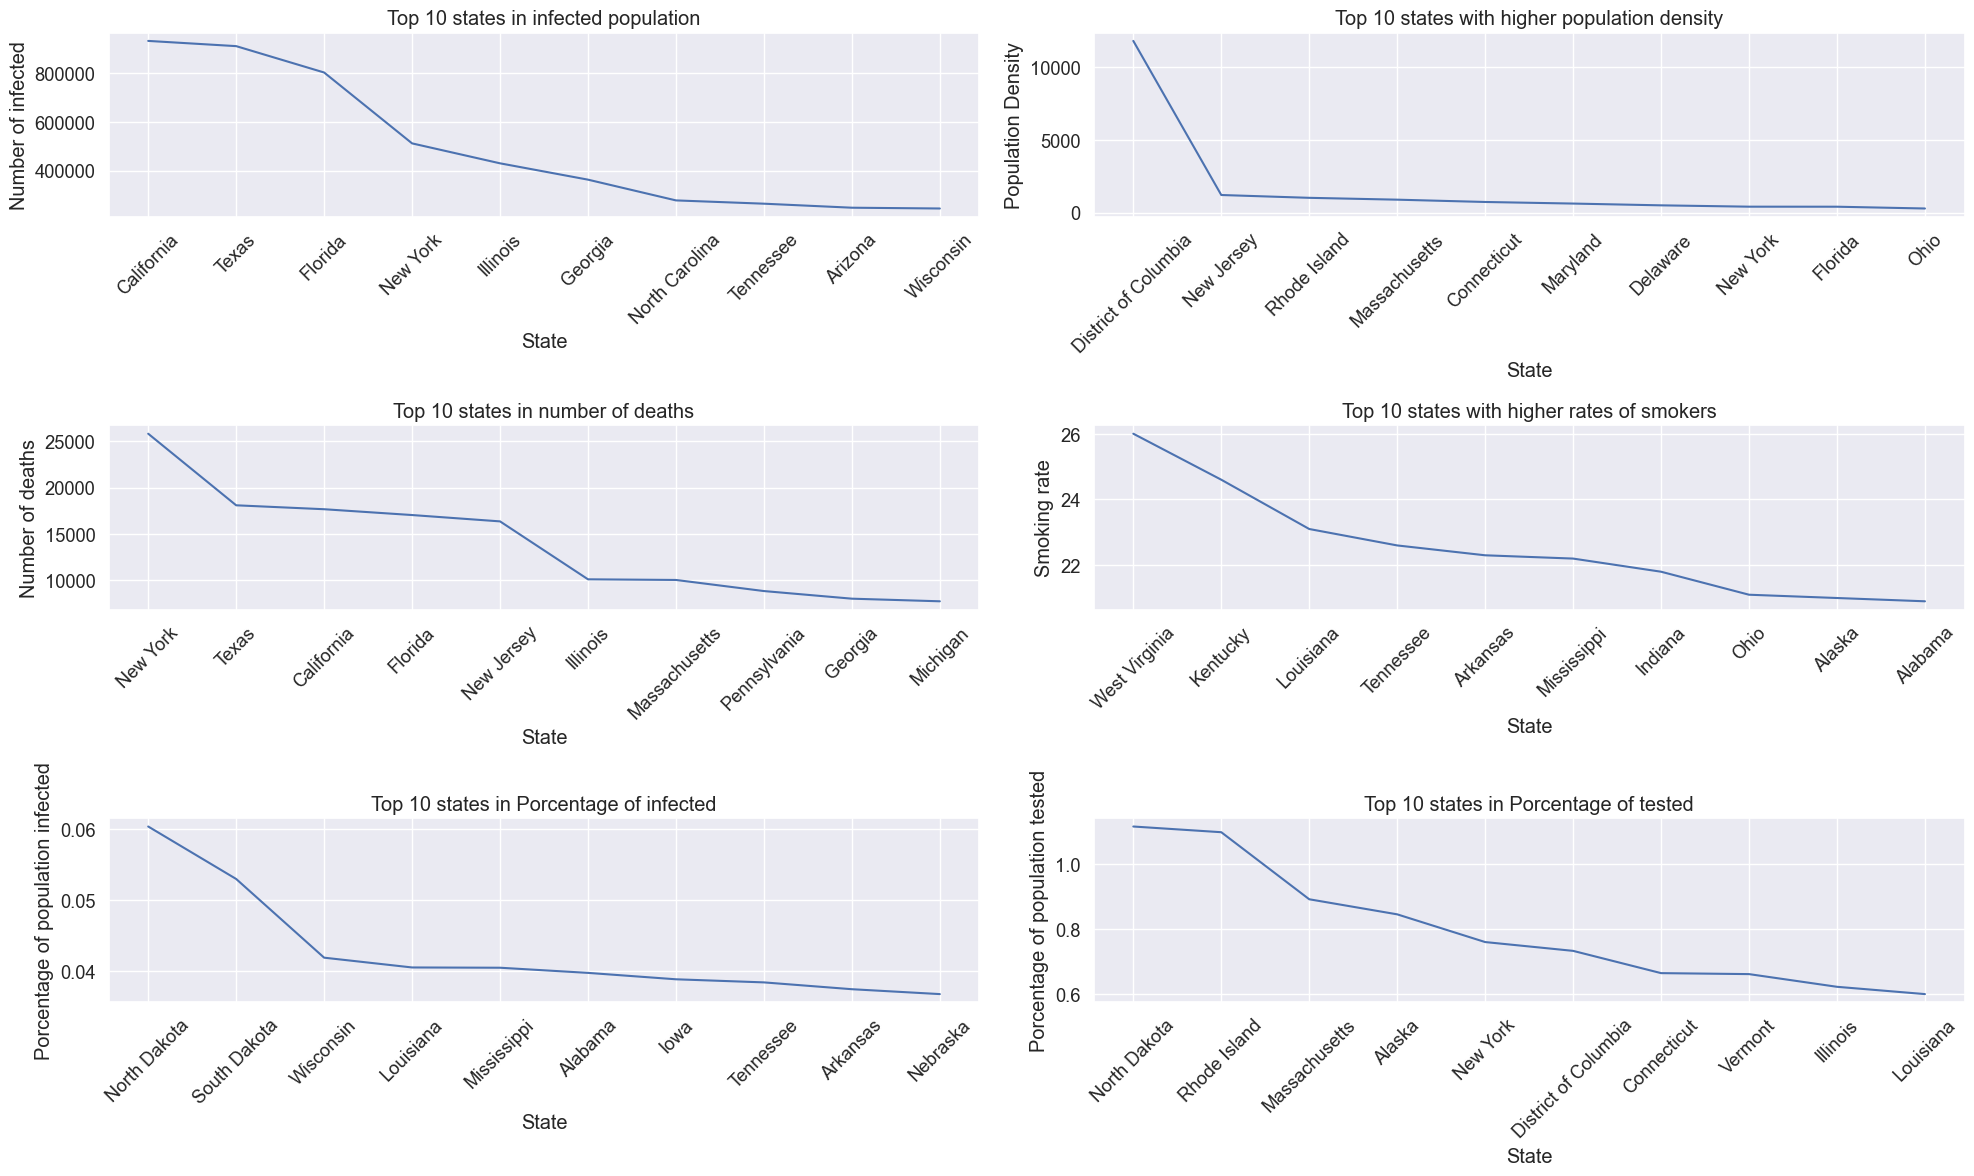

In [28]:
#Getting the top 10 states from different categories
sorted_infected = states_data.sort_values('Infected', ascending=False).head(10)
sorted_density = states_data.sort_values('Pop Density', ascending=False).head(10)
sorted_death = states_data.sort_values('Deaths', ascending=False).head(10)
sorted_smoking = states_data.sort_values('Smoking Rate', ascending=False).head(10)
sorted_porc_inf = states_data.sort_values('%pop_infected', ascending=False).head(10)
sorted_porc_tes = states_data.sort_values('%pop_tested', ascending=False).head(10)

sns.set_theme(font_scale=1.2)
fig, axes = plt.subplots(3, 2, figsize=(20,12))  # 3 row, 2 columns for 6 subplots

# 1st plot Num Infected
sns.lineplot(x='State', y='Infected', data=sorted_infected, ax=axes[0,0])
axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('Number of infected')
axes[0,0].set_title('Top 10 states in infected population')
plt.setp(axes[0,0].xaxis.get_majorticklabels(), rotation=45)

# 2nd plot Pop Density
sns.lineplot(x='State', y='Pop Density', data=sorted_density, ax=axes[0,1])
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Population Density')
axes[0,1].set_title('Top 10 states with higher population density')
plt.setp(axes[0,1].xaxis.get_majorticklabels(), rotation=45)

# 3rd plot Num Deaths
sns.lineplot(x='State', y='Deaths', data=sorted_death, ax=axes[1,0])
axes[1,0].set_xlabel('State')
axes[1,0].set_ylabel('Number of deaths')
axes[1,0].set_title('Top 10 states in number of deaths')
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45)

# 4th plot Rate Smokers
sns.lineplot(x='State', y='Smoking Rate', data=sorted_smoking, ax=axes[1,1])
axes[1,1].set_xlabel('State')
axes[1,1].set_ylabel('Smoking rate')
axes[1,1].set_title('Top 10 states with higher rates of smokers')
plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=45)

# 5th plot
sns.lineplot(x='State', y='%pop_infected', data=sorted_porc_inf, ax=axes[2,0])
axes[2,0].set_xlabel('State')
axes[2,0].set_ylabel('Porcentage of population infected')
axes[2,0].set_title('Top 10 states in Porcentage of infected')
plt.setp(axes[2,0].xaxis.get_majorticklabels(), rotation=45)

# 6th plot
sns.lineplot(x='State', y='%pop_tested', data=sorted_porc_tes, ax=axes[2,1])
axes[2,1].set_xlabel('State')
axes[2,1].set_ylabel('Porcentage of population tested')
axes[2,1].set_title('Top 10 states in Porcentage of tested')
plt.setp(axes[2,1].xaxis.get_majorticklabels(), rotation=45)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

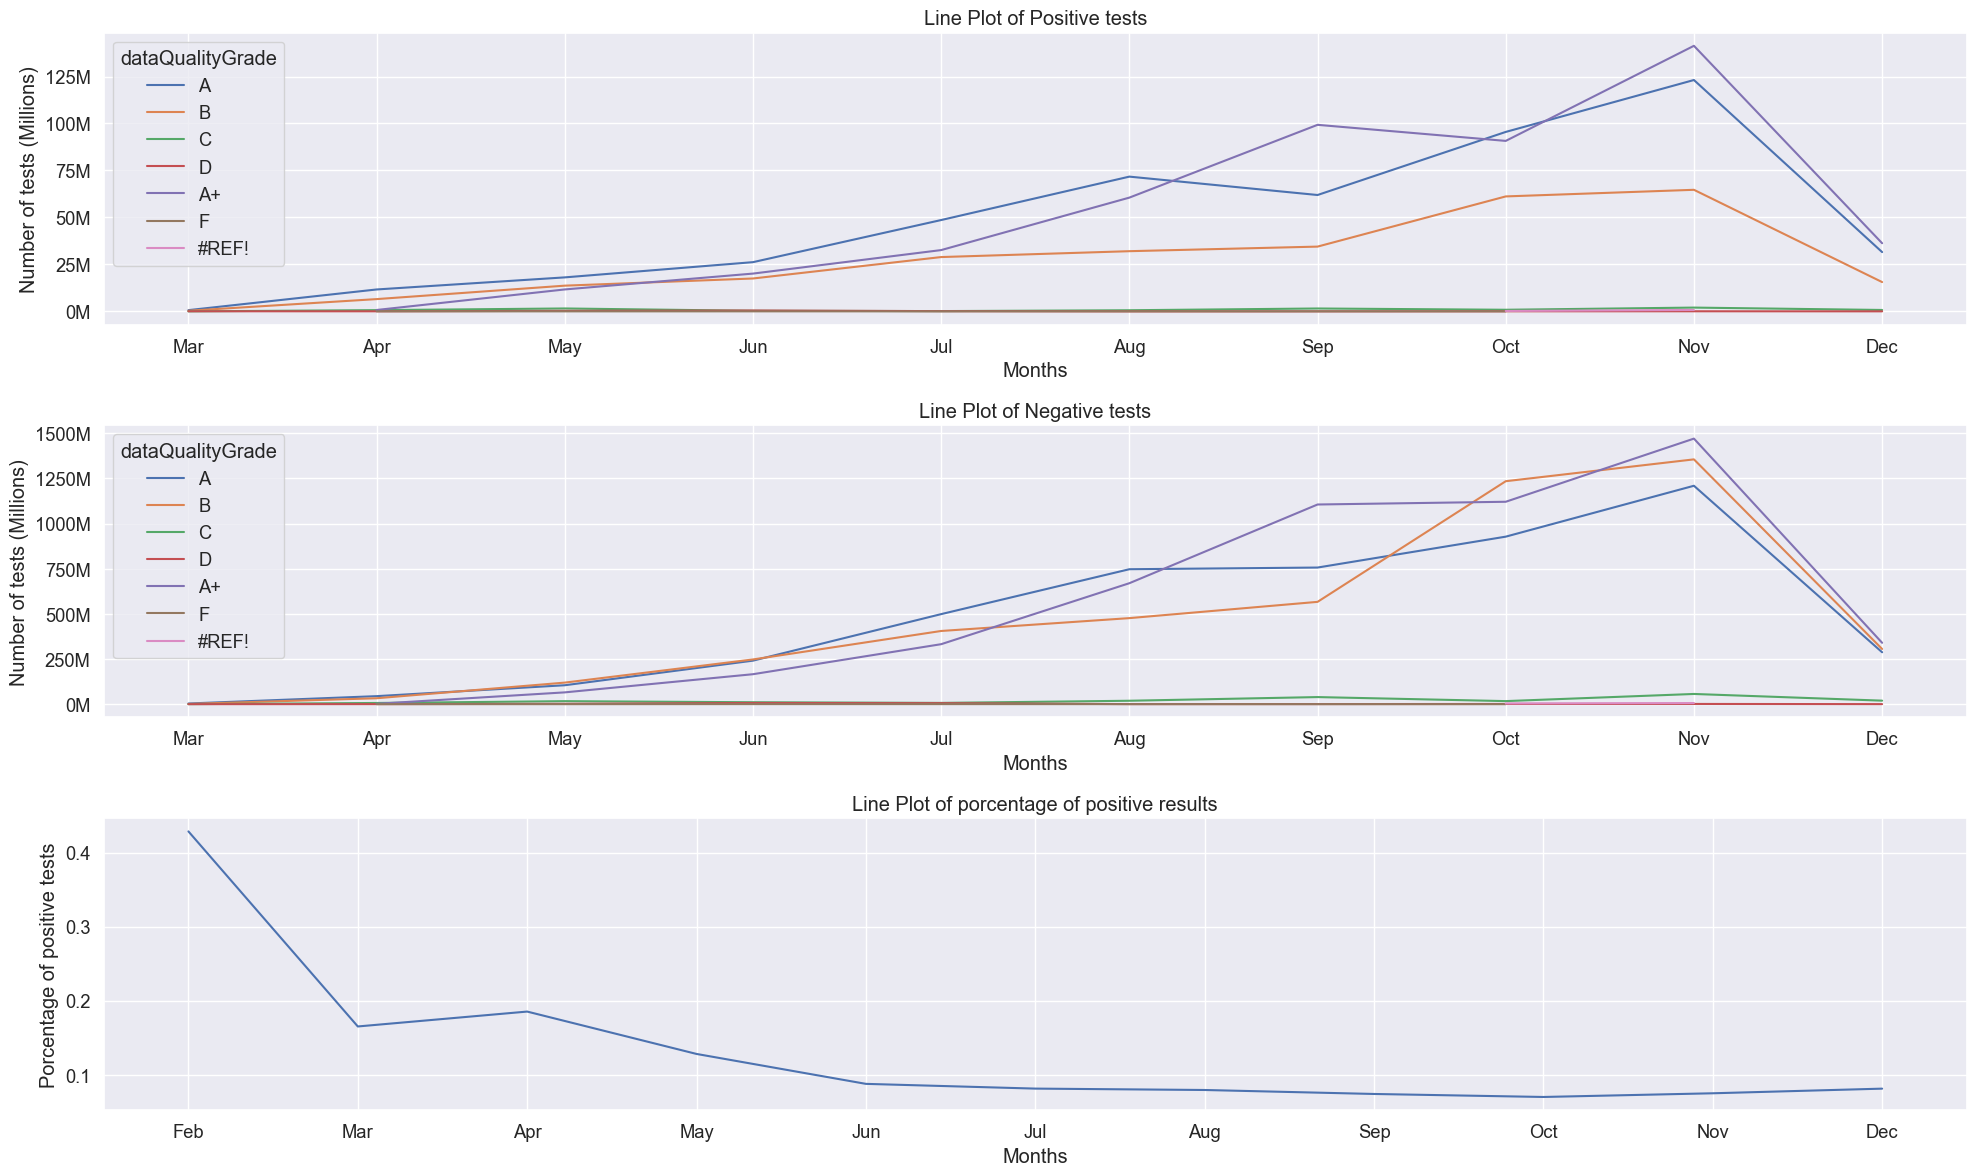

In [86]:
#Group by month and dataQuality
grouped_data1 = covid_data.groupby(by = ['month', 'month_name', 'dataQualityGrade']).agg({'positive':'sum', 'negative':'sum', 'death':'sum', 'hospitalized':'sum'})
grouped_data2 = covid_data.groupby(['month', 'month_name']).agg({'positive':'sum', 'negative':'sum', 'death':'sum', 'hospitalized':'sum'})
grouped_data2['%Positives_Tests'] = grouped_data2['positive']/(grouped_data2['negative'] + grouped_data2['positive'])

# Create a bar plot of positives and negatives grouped by month
sns.set_theme(font_scale=1.2)
fig, axes = plt.subplots(3, 1, figsize=(20,12))  # 4 row, 1 columns for 6 subplots


sns.lineplot(x='month_name', y='positive', data=grouped_data1, hue='dataQualityGrade', legend=True, ax=axes[0])
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Number of tests (Millions)')
axes[0].set_title('Line Plot of Positive tests')
sns.lineplot(x='month_name', y='negative', data=grouped_data1, hue='dataQualityGrade', legend=True, ax=axes[1])
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Number of tests (Millions)')
axes[1].set_title('Line Plot of Negative tests')
sns.lineplot(x='month_name', y='%Positives_Tests', data=grouped_data2, ax=axes[2])
axes[2].set_xlabel('Months')
axes[2].set_ylabel('Porcentage of positive tests')
axes[2].set_title('Line Plot of porcentage of positive results')

# Create a custom formatter to show units in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

# Apply the custom formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In [80]:
covid_data[covid_data['month']==4]['positive'].sum()

19644427.0

In [85]:
covid_data[covid_data['month']==4]['negative'].sum()

86387804.0

In [49]:
#Check for correlation between the different columns and the amount of infected
sel_cols = ['Pop Density', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
    'Smoking Rate', 'Health Spending', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+']

corr_matrix = states_data[sel_cols + ['Infected']].corr()
corr_matrix

,Pop Density,Income,GDP,Unemployment,Sex Ratio,Smoking Rate,Health Spending,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,Infected
Pop Density,1.000000,0.019956,0.898326,0.284099,-0.401153,-0.174545,0.460614,0.061071,0.326033,-0.181917,0.777639,-0.337299,-0.087721
Income,0.019956,1.000000,0.362317,-0.138739,0.132090,-0.563845,0.456135,-0.362996,0.425159,-0.308897,0.265425,0.029543,0.111118
GDP,0.898326,0.362317,1.000000,0.217973,-0.212180,-0.355842,0.580269,-0.127684,0.456731,-0.165228,0.825844,-0.408210,-0.031174
Unemployment,0.284099,-0.138739,0.217973,1.000000,-0.143195,0.378576,0.247427,0.020485,0.044893,-0.015815,0.218631,-0.151054,-0.021688
Sex Ratio,-0.401153,0.132090,-0.212180,-0.143195,1.000000,-0.075220,-0.037857,-0.650249,-0.196080,0.350469,-0.297696,-0.118238,-0.201121
Smoking Rate,-0.174545,-0.563845,-0.355842,0.378576,-0.075220,1.000000,-0.003635,0.118119,-0.613050,0.045718,-0.312298,0.226318,-0.186406
Health Spending,0.460614,0.456135,0.580269,0.247427,-0.037857,-0.003635,1.000000,-0.491829,-0.075022,-0.514113,0.308054,0.238377,-0.274788
Temperature,0.061071,-0.362996,-0.127684,0.020485,-0.650249,0.118119,-0.491829,1.000000,0.233079,0.070284,0.021888,-0.070813,0.443527
Urban,0.326033,0.425159,0.456731,0.044893,-0.196080,-0.613050,-0.075022,0.233079,1.000000,0.059439,0.548735,-0.433562,0.374364
Age 0-25,-0.181917,-0.308897,-0.165228,-0.015815,0.350469,0.045718,-0.514113,0.070284,0.059439,1.000000,-0.133599,-0.753962,0.127790


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

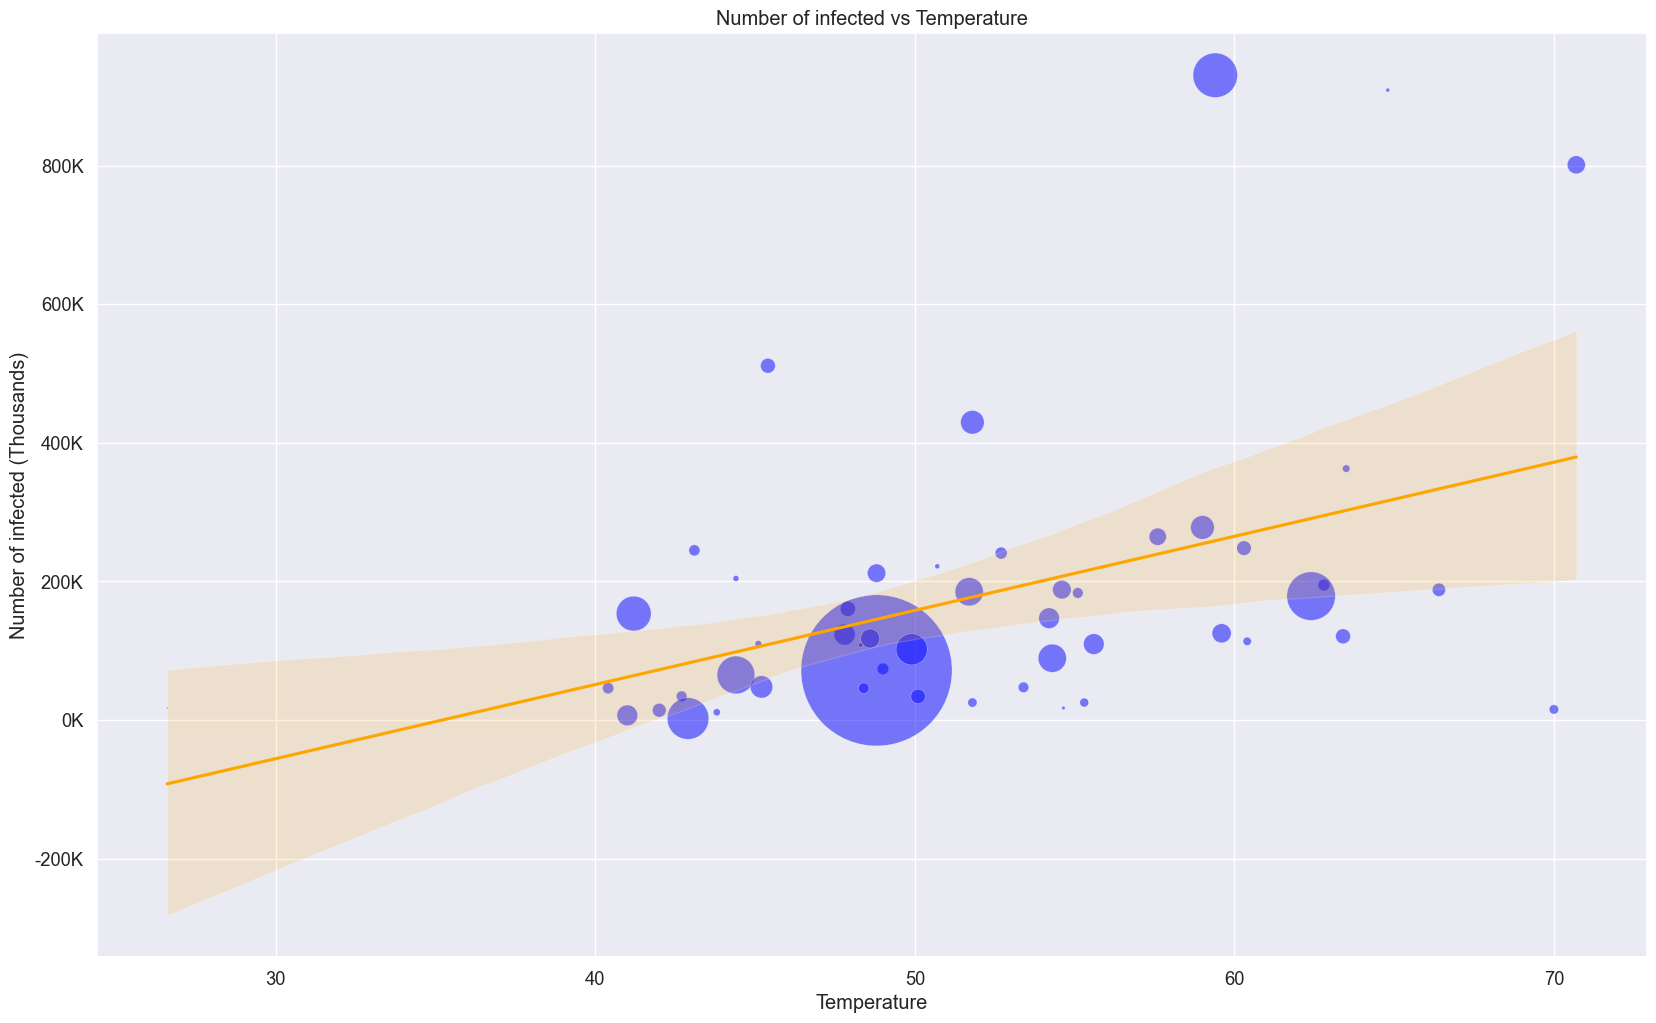

In [73]:
sns.set_theme(font_scale=1.2)
plt.figure(figsize=(20,12))

sns.scatterplot(x='Temperature', y='Infected', data=states_data, size='Pop Density', sizes=states_data['Pop Density'].to_list(), color='Blue', alpha=0.5, legend=False)
sns.regplot(x='Temperature', y='Infected', data=states_data, scatter=False, color='Orange', label='Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Number of infected (Thousands)')
plt.title('Number of infected vs Temperature')

def thousands_formatter(x, pos):
    return f'{x/1e3:.0f}K'

formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()